In [1]:
%cd /content/
!git clone https://github.com/Simon773/diffusion_model.git




# 4. On installe les librairies (PyYAML n'est pas toujours là, tqdm non plus)
!pip install pyyaml tqdm
%cd /content/diffusion_model

# 2. On installe le projet en mode "editable"
!pip install -e .

/content
Cloning into 'diffusion_model'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 123 (delta 50), reused 108 (delta 37), pack-reused 0 (from 0)
Receiving objects: 100% (123/123), 21.20 KiB | 7.07 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/diffusion_model
Obtaining file:///content/diffusion_model
  Preparing metadata (setup.py) ... done
  Running setup.py develop for diffusion_project


Chargement de /content/drive/MyDrive/M2 D3S/Diffusion_model/Unet_128_epoch_90.pt...


999it [00:52, 19.16it/s]


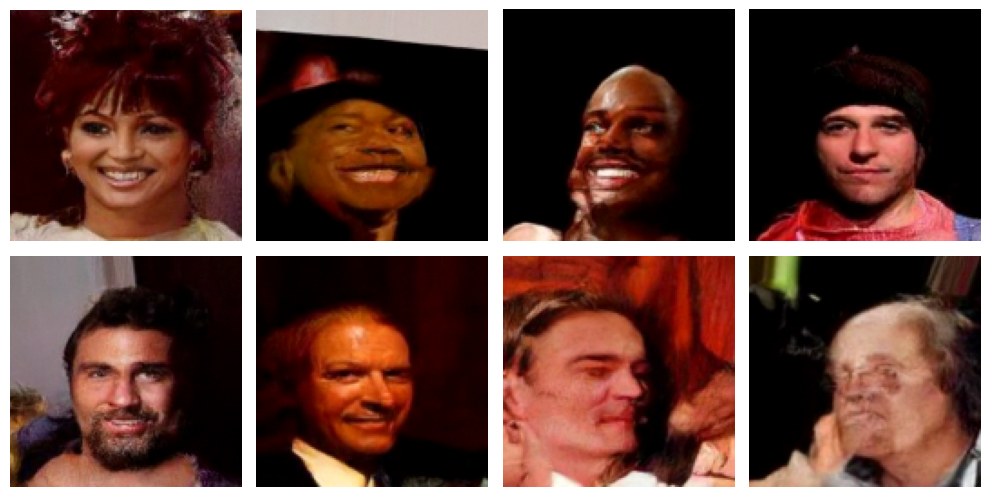

In [18]:
import matplotlib.pyplot as plt
import torch
import os
from torchvision.utils import save_image

from diffusion.noise_schedule import Diffusion
from models.unet import Unet

#add the correct model with appropriate path here
checkpoint_path = "/content/drive/MyDrive/M2 D3S/Diffusion_model/Unet_128_epoch_90.pt"
device = "cuda"

#use correct hyperparameters with config or here manually
model = Unet(
    in_channels=3,
    out_channels=3,
    base_channels=64,
    time_embedding_dim=64,
).to(device)

print(f"Chargement de {checkpoint_path}...")
loaded_content = torch.load(checkpoint_path, map_location=device)

if isinstance(loaded_content, dict) and "model_state_dict" in loaded_content:
    model.load_state_dict(loaded_content["model_state_dict"])
else:
    model.load_state_dict(loaded_content)

diffusion = Diffusion(img_size=128, device="cuda",noise_steps=1000)

generated_images = diffusion.reverse_diffusion(model, n_samples=8)



def plot_results(images):
    plt.figure(figsize=(10, 10))
    for i in range(images.shape[0]):
        plt.subplot(4, 4, i + 1)

        img = (images[i] + 1) / 2
        img = img.clamp(0, 1)

        img = img.permute(1, 2, 0).cpu().numpy()

        plt.imshow(img)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_results(generated_images)

output_dir = "generated_images"
os.makedirs(output_dir, exist_ok=True)



for i in range(generated_images.shape[0]):
    filename = f"gen_image_64_{i}.png"
    save_path = os.path.join(output_dir, filename)
    single_image = generated_images[i]
    save_image(single_image, save_path, normalize=True, value_range=(-1, 1))

